# 로지스틱 회귀분석

In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# 데이터 import
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()
cancer = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)

In [3]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X_train = cancer['mean radius'].values.reshape([-1, 1]).astype(np.float32)
y_train = cancer_dataset.target.reshape([-1, 1])

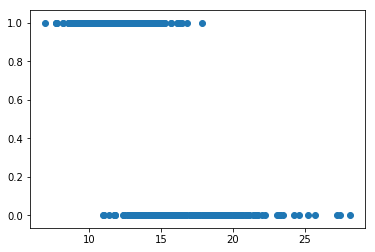

In [5]:
plt.scatter(x=X_train, y=y_train)
plt.show()

In [6]:
print(X_train.shape)
print(y_train.shape)

(569, 1)
(569, 1)


In [7]:
def weight_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial, name='weight')

def bias_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial, name='bias')

In [34]:
w = weight_variable([1, 1])
b = bias_variable([1])

x = tf.placeholder(tf.float32, [None, 1])
y_t = tf.placeholder(tf.float32, [None, 1])
y = tf.sigmoid(tf.matmul(x, w) + b)

In [35]:
loss = -tf.reduce_sum(y_t * tf.log(y) + (1-y_t)*tf.log(1-y))

In [36]:
train_step = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(loss)

In [37]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(4000):
        sess.run(train_step, feed_dict={
            x: X_train,
            y: y_train
        })
        if epoch % 1000 == 0:
            print('epoch: ', epoch)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_11' with dtype float and shape [?,1]
	 [[node Placeholder_11 (defined at <ipython-input-34-1ef675d57480>:5) ]]

Original stack trace for 'Placeholder_11':
  File "/Users/kwon/.pyenv/versions/3.6.5/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/kwon/.pyenv/versions/3.6.5/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Users/kwon/.pyenv/versions/3.6.5/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/Users/kwon/.pyenv/versions/3.6.5/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/Users/kwon/.pyenv/versions/3.6.5/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-1ef675d57480>", line 5, in <module>
    y_t = tf.placeholder(tf.float32, [None, 1])
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 2143, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 6262, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/Users/kwon/PycharmProjects/Sweetk_Analysis/venv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()
